# Part I - (Exploration the Ford GoBike System Dataset)
## by (Saad BinOnayq)

## Introduction
> This data set contains approximately 175,000 rows of individual trip data on February 2019, covering the greater San Francisco Bay area. Each row represents a bike ride and contains 15 original features such as the start and end time of the trip, the name, number and location of the start and end of the trip, the customer's membership type, year of birth and gender. The data also includes information on whether or not a bike was shared on all trips. This dataset provides valuable insights into how people use bike-sharing systems in San Francisco Bay Area.





## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


%matplotlib inline
import plotly.io as pio
pio.renderers.default = "notebook_connected"

pd.set_option('display.max_columns', None)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**So, the dataset have several wrong types like date columns but it's object, or integer but it's float in the dataset. Also there is null values.**

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**Every column have logical values, except the member_brith_year column has min brith year with 1878, and it's doesn't make sense, so i will check number of members that has brith date less than 1950 (greater than 70 years old)** 

In [7]:
df[df['member_birth_year']<1950].shape

(674, 16)

In [8]:
df = df[df['member_birth_year']>=1950].copy()

**So, I droped the rows that had brith date year less than 1950 (greater than 70 years old) becuase there is outliers; only 680 rows from 180000 rows.**

In [9]:
df.describe(exclude='number')

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,174473,174473,174278,174278,174473,174473,174473
unique,174462,174460,329,329,2,3,2
top,2019-02-15 07:47:00.1970,2019-02-28 17:40:37.3280,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,2,3644,4619,157870,130077,157337


In [10]:
df.isna().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [11]:
df[df.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


**There is only null values in 195 rows in bike stations information (name, id) and the longtude and the latitude is rounded so it's not accurate location. So, my desision is to drop these rows, because the location information is so important**

In [12]:
df = df[~df.start_station_id.isna()].copy()

In [13]:
# Change data types to correct types

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['member_birth_year'] = df['member_birth_year'].astype('int')

### Add more columns

#### Add age column 

In [14]:
# Subract today year with member brith year to get member age for now
df['member_age'] = pd.to_datetime('today').year - df['member_birth_year']

#### Add Trip Distance column
That have total distance form the start lat&lon to the end lat&long in meters

In [15]:
import geopy.distance as gdis

def get_station_distance(row):
    return gdis.distance((row['start_station_latitude'], row['start_station_longitude']) ,(row['end_station_latitude'], row['end_station_longitude'])).meters

df['trip_distance'] = df.apply(get_station_distance,axis=1)

#### Add Trip Duration in Minutes column
That have total duration time form the start time to the end time in minutes

In [16]:
def get_trip_minuts(row):
    return ((row['end_time'] - row['start_time']).seconds/60)

df['Trip_Minutes_Duration'] = round(df.apply(get_trip_minuts, axis=1))

#### Extract start time column to several columns
Extract the Hours of trip start and the day and the Day name (Sat,Fri,..etc)

In [17]:
df['Hour'] = df['start_time'].dt.hour

df['Day'] = df['start_time'].dt.day

df['Day_Name'] = df['start_time'].dt.day_name()


#### Add is_weekend column
This column is Ture if the day is weekend

In [18]:
df['Is_Weekend'] = False

df.loc[df['Day_Name'].isin(['Saturday', 'Sunday']), 'Is_Weekend'] = True

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174278 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174278 non-null  int64         
 1   start_time               174278 non-null  datetime64[ns]
 2   end_time                 174278 non-null  datetime64[ns]
 3   start_station_id         174278 non-null  int32         
 4   start_station_name       174278 non-null  object        
 5   start_station_latitude   174278 non-null  float64       
 6   start_station_longitude  174278 non-null  float64       
 7   end_station_id           174278 non-null  int32         
 8   end_station_name         174278 non-null  object        
 9   end_station_latitude     174278 non-null  float64       
 10  end_station_longitude    174278 non-null  float64       
 11  bike_id                  174278 non-null  int64         
 12  user_type       

#### Add Age_Category column
This column contain age category:
- (18-35) Young Adult
- (36-55) Middle Adult
- (56-70) Old Adult

In [20]:
def get_age_category(age):
    if age >18 and age<36:
        return 'Young Adult'
    elif age >=36 and age <56:
        return 'Middle Adult'
    elif age>=56:
        return 'Old Adult'

In [21]:
df['Age_Category'] = df['member_age'].apply(get_age_category)

In [22]:
df.to_csv('New_FordGoBike.csv', index=False)

### What is the structure of your dataset?

> This data contains approximately 175,000 rows, each row representing a bike ride, in San Francisco Bay in February 2019. 
> This data contains 15 original features:
- The start and end time of the trip.
- The name, number and location of the start and end of the trip.
- The customer's membership type, year of birth and gender
- Is share the bike on all trips.
> And 8 additional features that I added to give greater detail and clarity to the data:
- Age of the member (extracted from the year of his birth).
- Age category ((18-35) Young Adult, (36-55) Middle Adult, (56-70) Old Adult)
- Trip distance in meters (extracted from the latitude and longitude of the starting and ending stations).
- Tripe duration in minutes.
- The hour of start time of the trip
- The day of the start of the trip.
- The name of the start day of the trip.
- Is this day a weekend or not (True if it's weekend, false if it's workdays)

### What is/are the main feature(s) of interest in your dataset?

> Knowing the times of requests for bikes. And, what is the distance traveled for each trip? And, how long is this trip?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip_Minutes_Duration, trip_distance, member_age, Hour

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




### **Q1: What is the distribution of trips over days in month 2?**

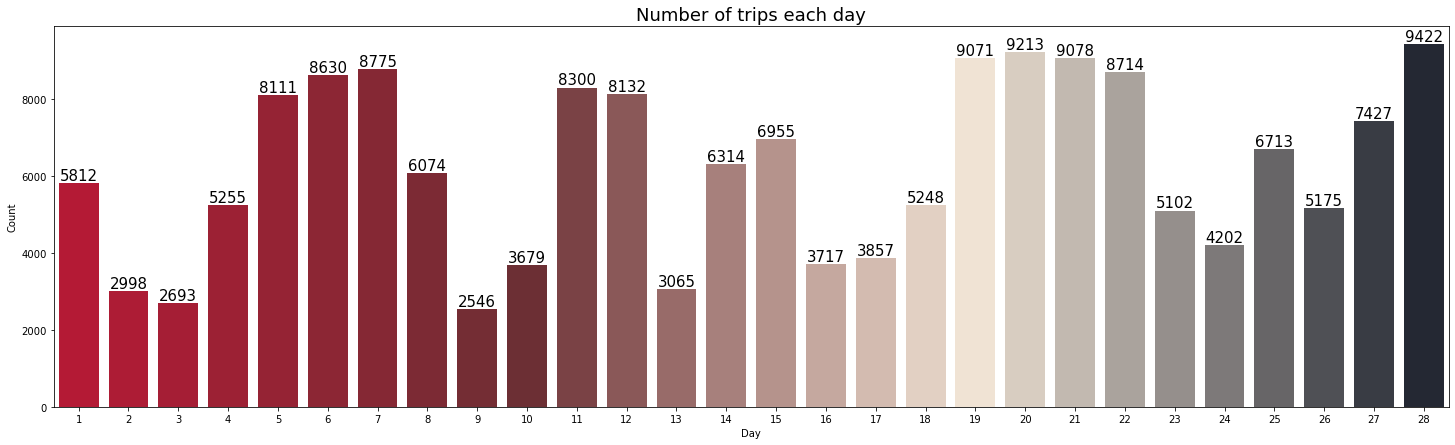

In [23]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['Day'].value_counts().index,
    y= df['Day'].value_counts(),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['Day'].value_counts().shape[0])
)
ax.bar_label(ax.containers[0],size=15)
ax.set(xlabel='Day', ylabel='Count')

plt.title('Number of trips each day',size = 18)
plt.show()

**As we can see in the plot above, the distribution of trips is almost equal over a whole month, and the highest trips were on the last day of this month with 9422 trips, and the lowest on the 9th with 2546 trips, and as it is noted that trips increase in five days and then decrease significantly in two days in Approximately 4 times, which indicates that these are weekend days.**

In [24]:
# plt.figure(figsize = (25,7))
# ax = sns.barplot(
#     x=df['Day'].value_counts().index,
#     y= df['Day'].value_counts(),
#     # order=df['Day'].value_counts().sort_values(ascending=False).index, 
#     palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['Day'].value_counts().shape[0])
# )

# plt.title('Sum Null Values On All Columns',size = 18)
# plt.show()

### **Q2: Where are the trips concentrated between the days of the week?**

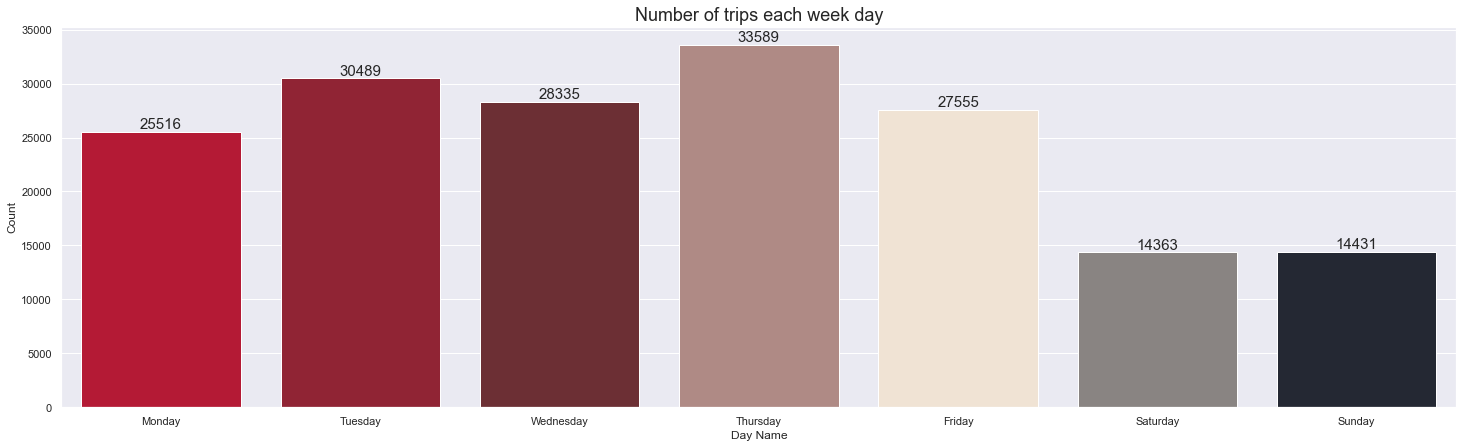

In [45]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['Day_Name'].value_counts().index,
    y= df['Day_Name'].value_counts(),
    order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] ,
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['Day_Name'].value_counts().shape[0])
)
ax.bar_label(ax.containers[0],size=15)
ax.set(xlabel='Day Name', ylabel='Count')

plt.title('Number of trips each week day',size = 18)
plt.show()

**As we can see in the plot above, trips are concentrated on Thursday with 33,589 trips, while the least trips are on Sunday and Monday with a close number of approximately 1,440 trips.**

### **Q3: Are the trips on working days or holidays?**

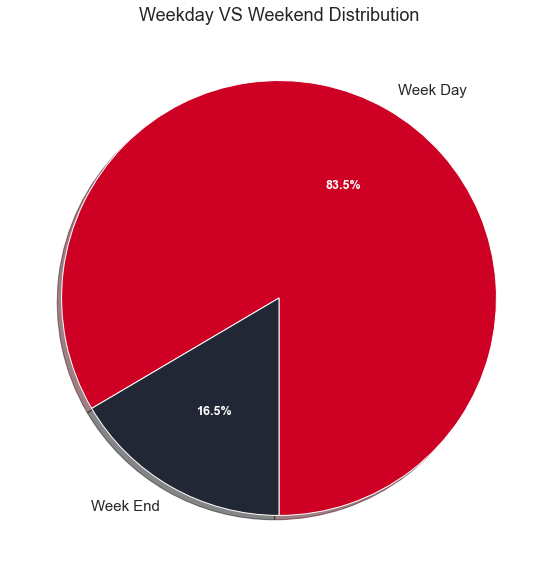

In [26]:
sns.set(rc={"figure.figsize":(17, 10)})
df_result = df['Is_Weekend'].value_counts()
labels =df_result.index
labels = ['Week Day','Week End']
sizes = df_result

_, labels, autopcts = plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,
colors= sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df_result.nunique())
)

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.setp(labels, fontsize=15) #update

plt.title('Weekday VS Weekend Distribution',size = 18)
plt.show()

**As we can see in the plot above, the majority of trips in February are on business days with 84 %, while trips on weekends are only 16 %**

### **Q4: What are the types of memberships and the number of each type?**

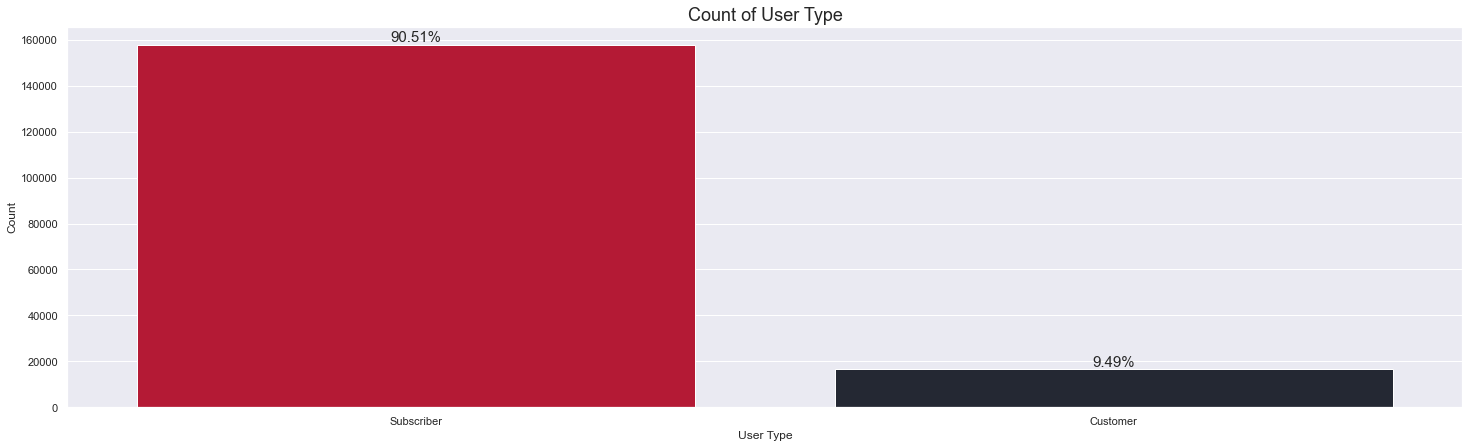

In [27]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['user_type'].value_counts().index,
    y= df['user_type'].value_counts(),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['user_type'].value_counts().shape[0])
)
ax.bar_label(ax.containers[0], [f'{x}%' for x in round(df['user_type'].value_counts(normalize=True)*100, 2).tolist()], size=15)
ax.set(xlabel='User Type', ylabel='Count')

plt.title('Count of User Type',size = 18)
plt.show()

**As we can see in the plot above, most of the users (bikers) are 90% subscribers, while 10% are customers.**

### **Q5: What are the genders of customers and their number for each gender?**

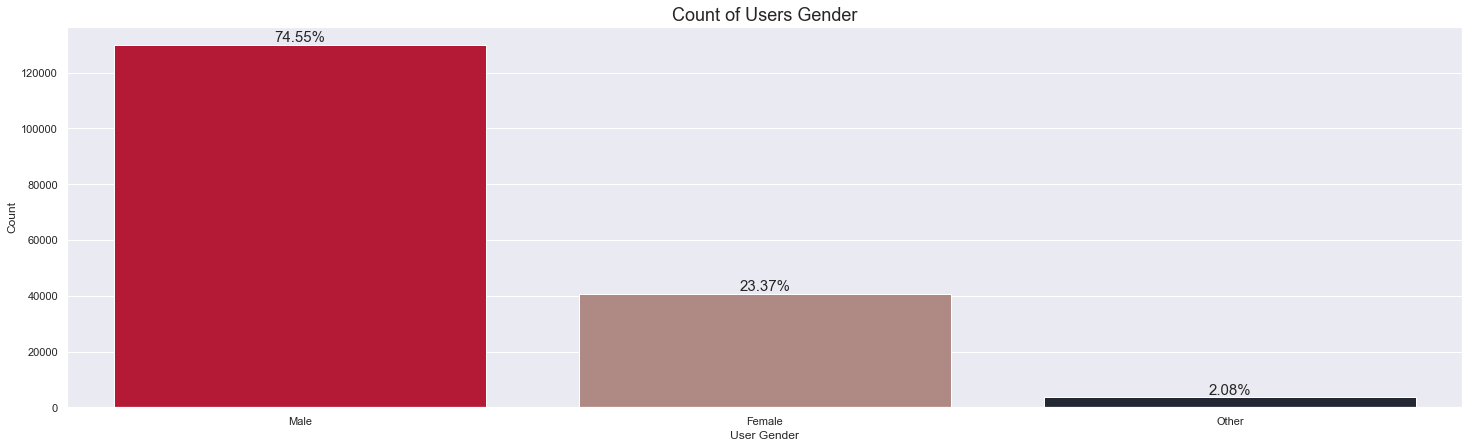

In [28]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['member_gender'].value_counts().index,
    y= df['member_gender'].value_counts(),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['member_gender'].value_counts().shape[0])
)
ax.bar_label(ax.containers[0], [f'{x}%' for x in round(df['member_gender'].value_counts(normalize=True)*100, 2).tolist()], size=15)
ax.set(xlabel='User Gender', ylabel='Count')

plt.title('Count of Users Gender',size = 18)
plt.show()

**As we can see in the plot above, most of the trips are led by males with more than 120,000 trips, or 74% of the total trips, while in trips led by females, with 40,000 trips, accounting for 23% of the total trips, and 2% of the trips users put that their gender is other.**

### **Q6: Is Bikes are Share For All Trip?**

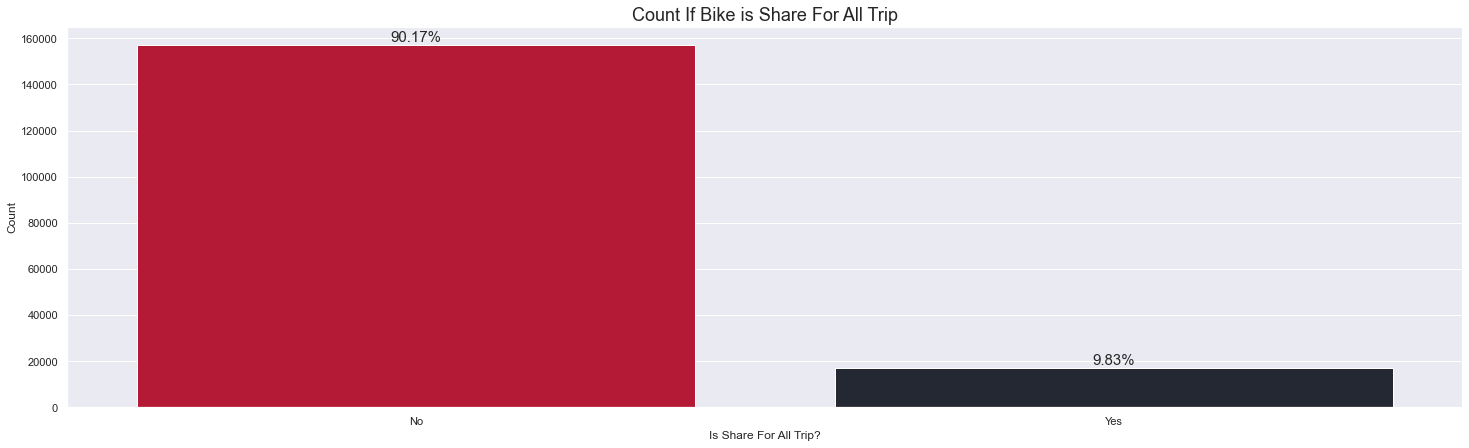

In [29]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['bike_share_for_all_trip'].value_counts().index,
    y= df['bike_share_for_all_trip'].value_counts(),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['bike_share_for_all_trip'].value_counts().shape[0])
)
ax.bar_label(ax.containers[0], [f'{x}%' for x in round(df['bike_share_for_all_trip'].value_counts(normalize=True)*100, 2).tolist()], size=15)
ax.set(xlabel='Is Share For All Trip?', ylabel='Count')

plt.title('Count If Bike is Share For All Trip',size = 18)
plt.show()

**As we can see in the plot above, most bikes are not share for all trips by 90%, with more than 150,000 trips. While bikes that are share for all trips are less than 10%.**

### **Q7: What are the ages of the customers who use the bikes?**

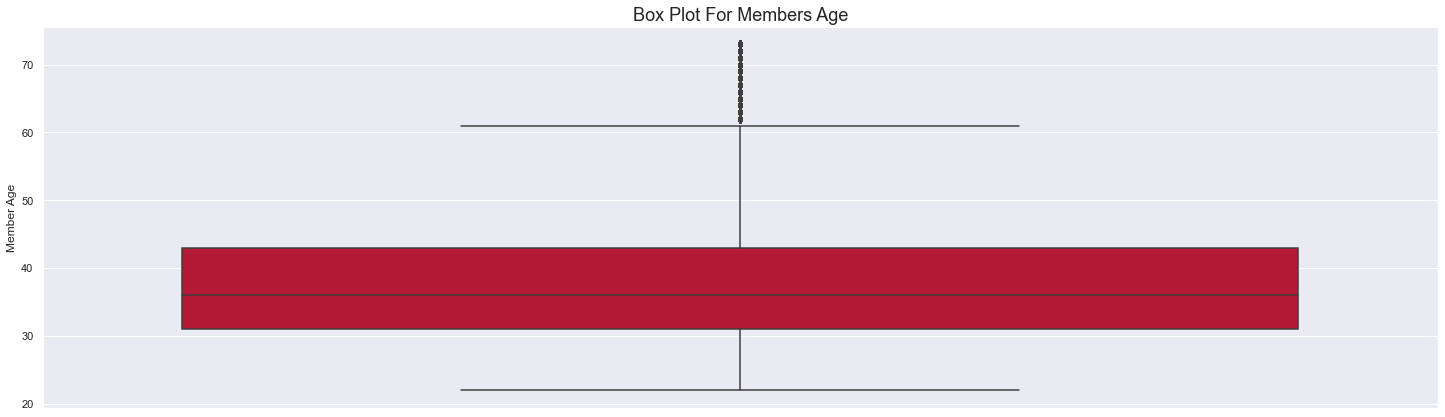

In [30]:
plt.figure(figsize = (25,7))
ax = sns.boxplot(
    data= df,
    y='member_age',
    palette=sns.color_palette("blend:#CE0024,#76252B")
)
ax.set(ylabel='Member Age')

plt.title('Box Plot For Members Age',size = 18)
plt.show()

**As we can see in the plot above, the median age of users is 36, and the majority of users are between 31 and 41, while the upper fence is 61 and while 22 is the lowest age and also it is the lower fence, but there are some outliers users with ages over 61 that exceed the upper fence.**

### **Q8: What are the top ten stations to start the trip?**

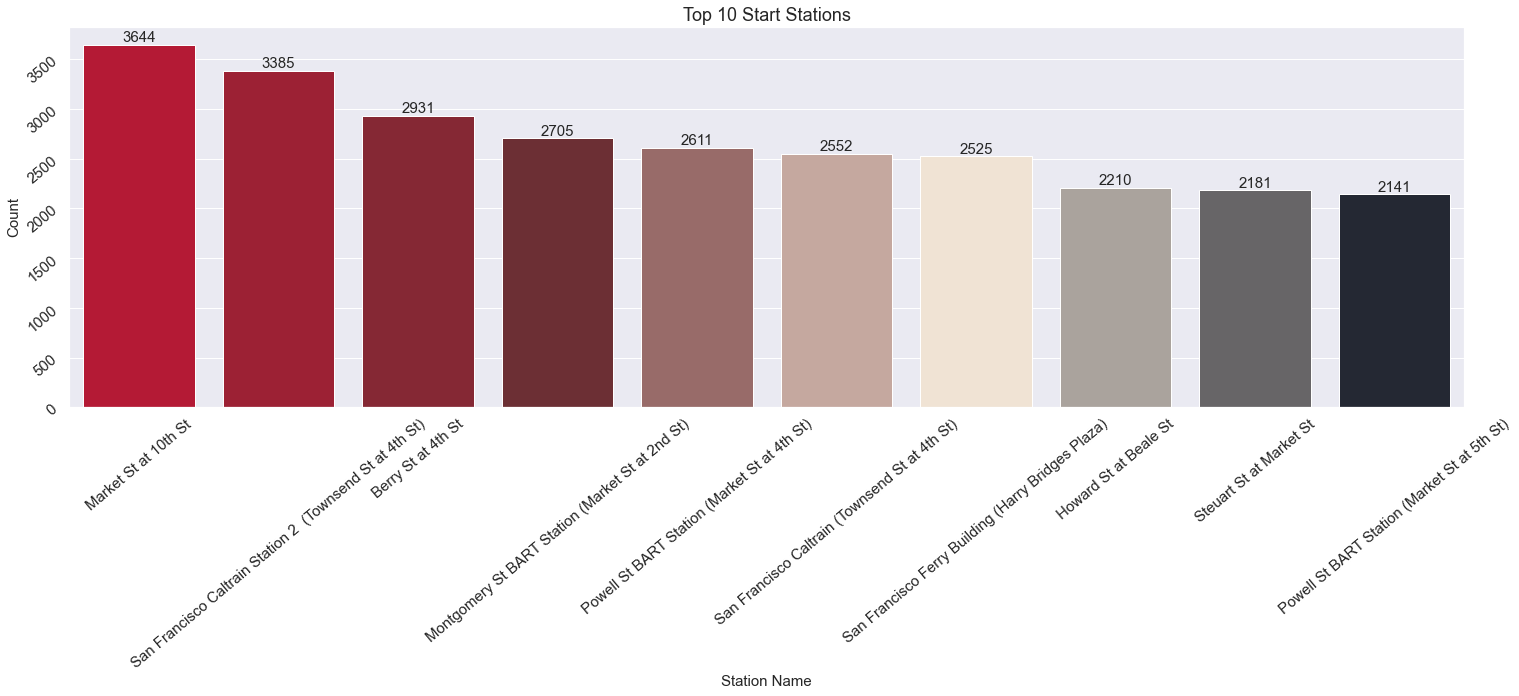

In [31]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['start_station_name'].value_counts().head(10).index,
    y= df['start_station_name'].value_counts().head(10),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['start_station_name'].value_counts().head(10).shape[0])
)
ax.bar_label(ax.containers[0], size=15)

ax.set_xlabel('Station Name', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

ax.tick_params(labelsize=15, labelrotation=40) 

plt.title('Top 10 Start Stations',size = 18)
plt.show()

**As we can see in the plot above, here we find the top ten starting stations for trips, and we also note that the average trips in these ten stations are approximately 2,600 trips, and the highest station is “Market Street on Tenth Street” with 3,644 trips. It is followed by "San Francisco Clarine 2 station" with 3385 trips.**

### **Q9: What are the top ten stations to end the trip?**

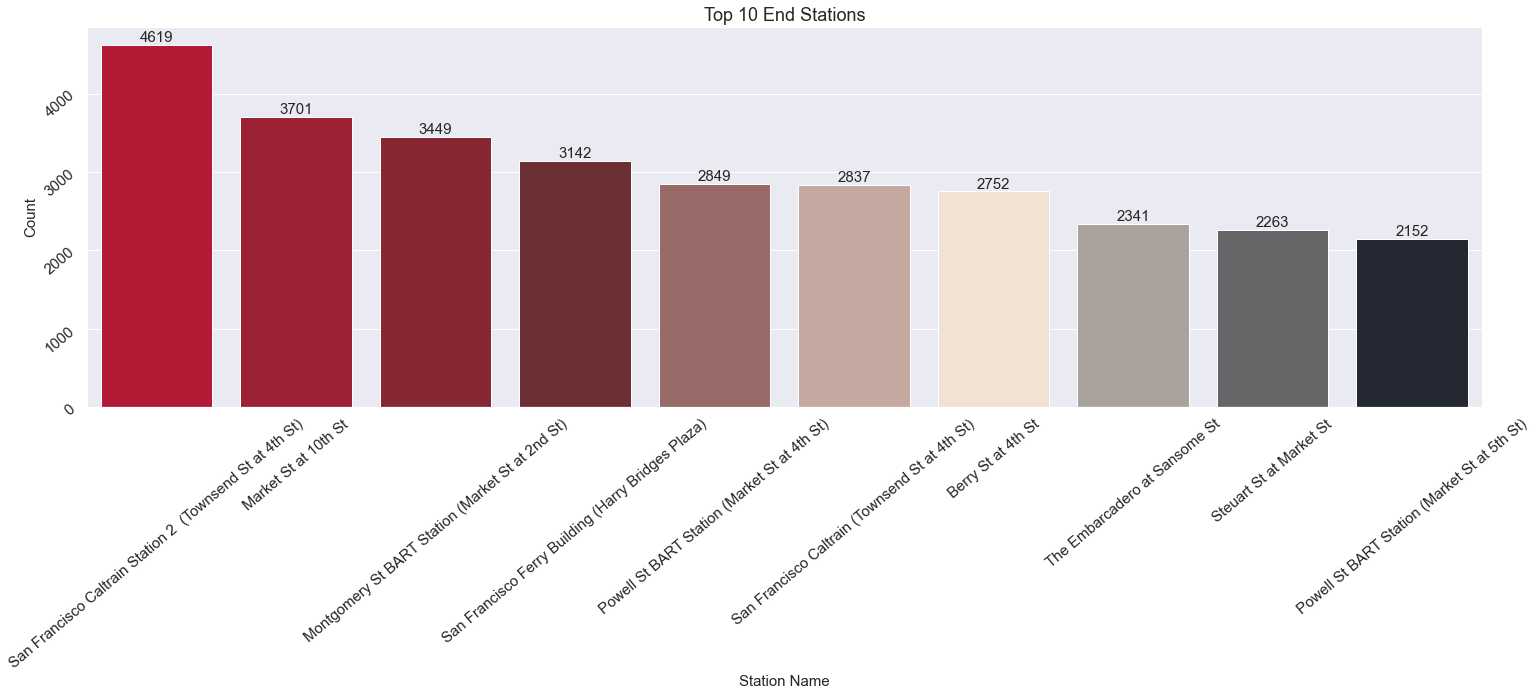

In [32]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['end_station_name'].value_counts().head(10).index,
    y= df['end_station_name'].value_counts().head(10),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['end_station_name'].value_counts().head(10).shape[0])
)
ax.bar_label(ax.containers[0], size=15)

ax.set_xlabel('Station Name', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

ax.tick_params(labelsize=15, labelrotation=40) 

plt.title('Top 10 End Stations',size = 18)
plt.show()

**As we can see in the plot above, here we find the top ten ending stations for trips, and we also note that the average trips in these ten stations are approximately 3000 trips, and the highest station is "San Francisco Clarine 2 station"  with 4,619 trips. It is followed by “Market Street on 10th Street” with 3,701 trips.**

### **Q10: What are the distribution of trips duration?**

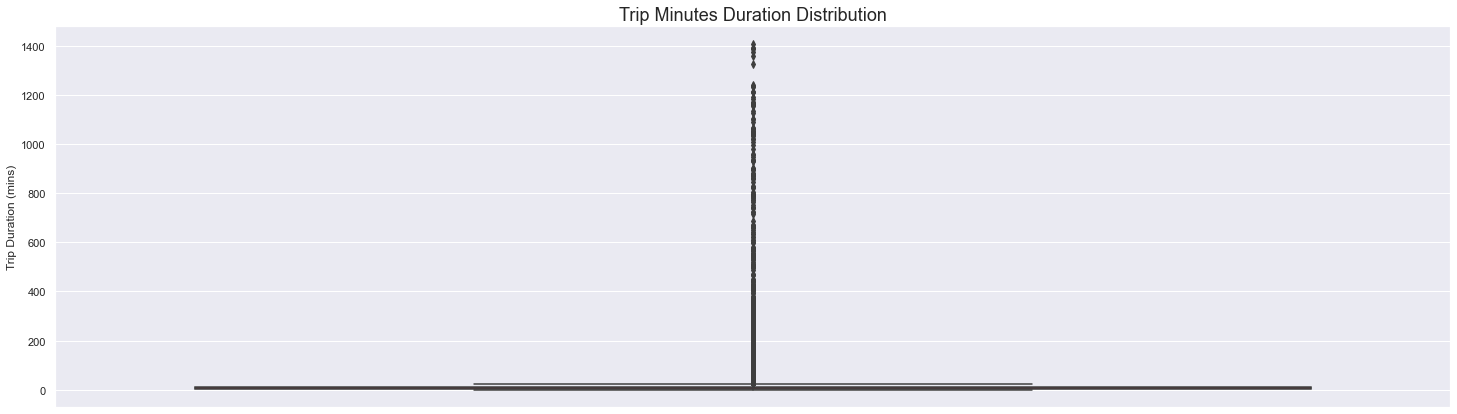

In [33]:
plt.figure(figsize = (25,7))
ax = sns.boxplot(
    data= df,
    y='Trip_Minutes_Duration',
    palette=sns.color_palette("blend:#CE0024,#76252B")
)
ax.set(ylabel='Trip Duration (mins)')

plt.title('Trip Minutes Duration Distribution',size = 18)
plt.show()

**As we can see in the plot above, We can't figure out the details of the box plot because there are outliers higher than about 30 minutes, so we'll try to plot again without the outliers.**

In [34]:
# Number of Trip Duration outliers
df[df['Trip_Minutes_Duration']>25].shape

(8736, 24)

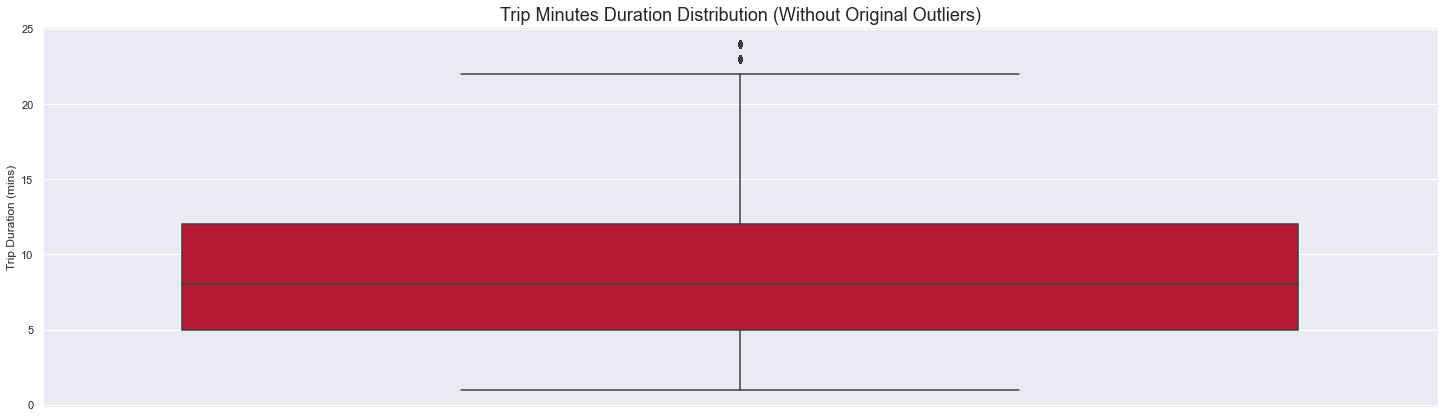

In [35]:
plt.figure(figsize = (25,7))
ax = sns.boxplot(
    data= df[df['Trip_Minutes_Duration']<25],
    y='Trip_Minutes_Duration',
    palette=sns.color_palette("blend:#CE0024,#76252B")
)
ax.set(ylabel='Trip Duration (mins)')

plt.title('Trip Minutes Duration Distribution (Without Original Outliers)',size = 18)
plt.show()

**As we can see now in the plot above, the median Trip duation is 9 minutes, and the most trip duration are between 5 and 12 minutes, while the upper fence is 22 minutes and 1 minutes is the lowest and also it is the lower fence, but here there are two outliers above the upper fence, and more than 8,000 values higher than the upper fence in the previous plot.**

### **Q11: What is the distrbution of trips over the hours?**

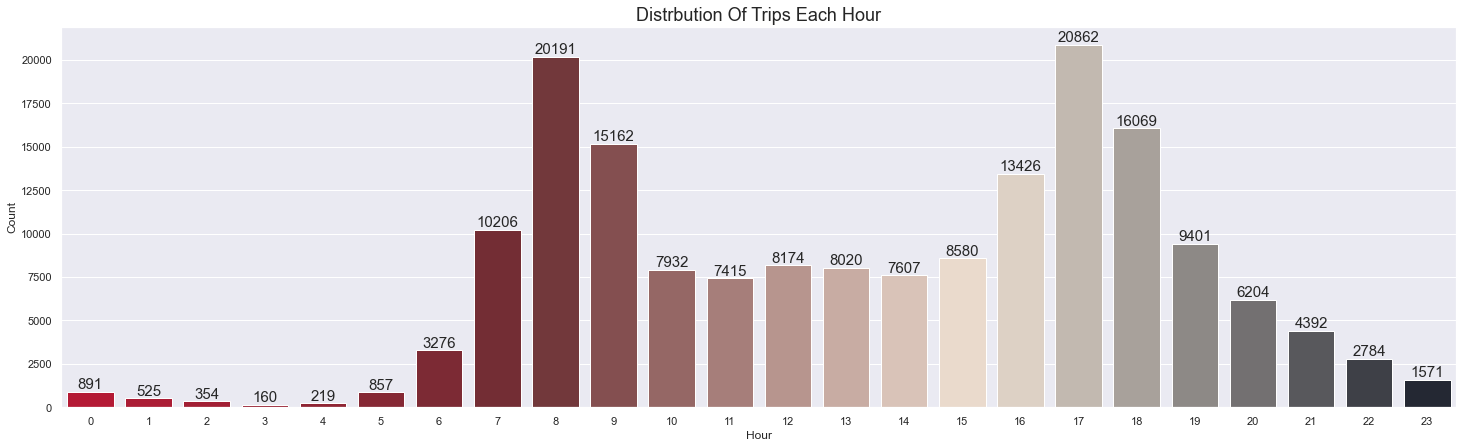

In [36]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    x=df['Hour'].value_counts().index,
    y= df['Hour'].value_counts(),
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['Hour'].value_counts().shape[0])
)
ax.bar_label(ax.containers[0], size=15)
ax.set(xlabel='Hour', ylabel='Count')

plt.title('Distrbution Of Trips Each Hour',size = 18)
plt.show()

**As we can see in the plot above, we can find that the night hours (22 pm to 5 am) do not have many trips, because it is a time for sleep and rest, but the two periods in which trips are most concentrated are the period (6 am to 9 am) and (4 pm to 6 pm) because they are working hours and jobs.**

### **Q12: What are the distribution of trips distance?**

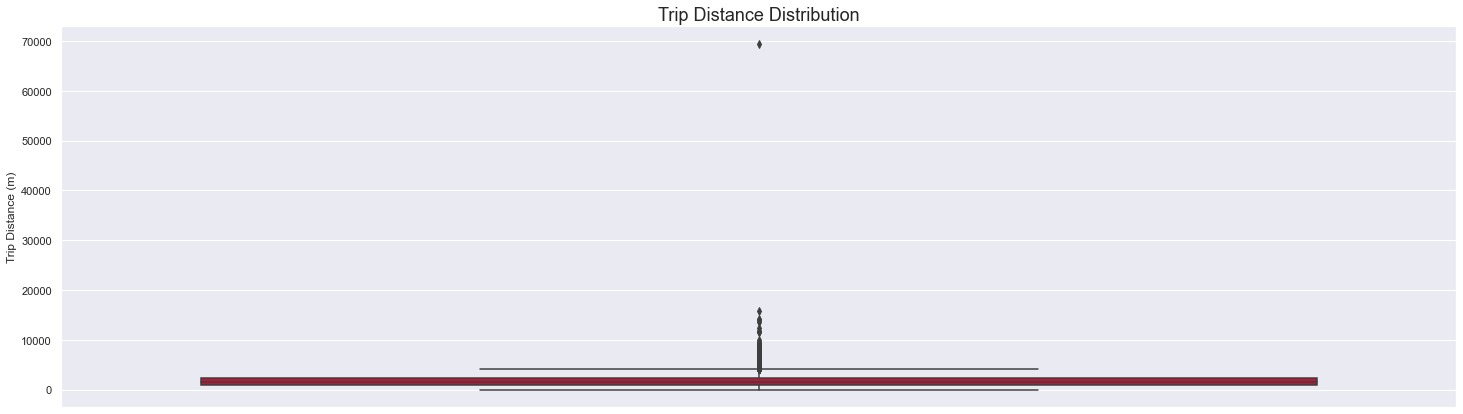

In [37]:
plt.figure(figsize = (25,7))
ax = sns.boxplot(
    data= df,
    y='trip_distance',
    palette=sns.color_palette("blend:#CE0024,#76252B")
)
ax.set(ylabel='Trip Distance (m)')

plt.title('Trip Distance Distribution',size = 18)
plt.show()

**As we can see in the plot above, We can't figure out the details of the box plot because there are outliers higher than about 4100 meters, so we'll try to plot again without the outliers.**

In [38]:
# Number of Trip Distance outliers
df[df['trip_distance']>=4197.9].shape

(5295, 24)

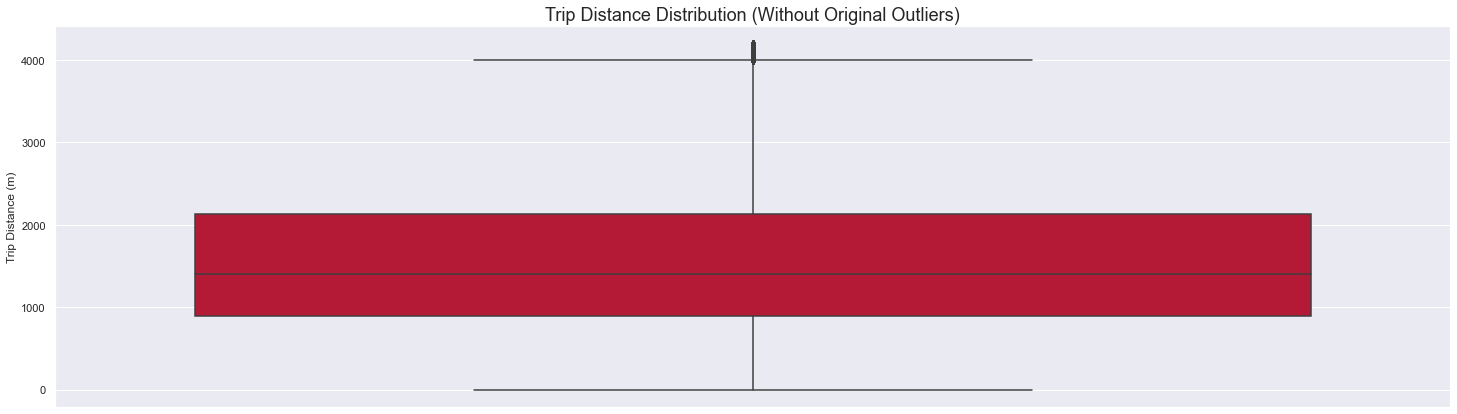

In [39]:
plt.figure(figsize = (25,7))
ax = sns.boxplot(
    data= df[df['trip_distance']<4197.9],
    y='trip_distance',
    palette=sns.color_palette("blend:#CE0024,#76252B")
)
ax.set(ylabel='Trip Distance (m)')

plt.title('Trip Distance Distribution (Without Original Outliers)',size = 18)
plt.show()

**As we can see now in the plot above, the median Trip duation is 1.4 Km, and the most trip distiances are between 0.89 km and 2.1 km, while the upper fence is 4 km and 0 km is the lowest because the start station is the end station, but here there are maybe 6 outliers above the upper fence, and more than 5000 values higher than the upper fence in the previous plot.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of the variables of interest show that most trips occur during the working hours of 6am to 9am and 4pm to 6pm, with Thursday having the highest number of trips. The median trip duration is 9 minutes, with most trips lasting between 5 and 12 minutes. The median trip distance is 1.4 km, with most trips ranging between 0.89 km and 2.1 km. There were some outliers in both plots, with more than 8,000 values higher than the upper fence for trip duration and more than 5,000 values higher than the upper fence for trip distance. No transformations were needed to analyze these variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, there is nothing unusual, except for the age of the customers, because there are outliers customers whose ages are between 70 and 150, and this is illogical, so they were deleted from the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### **Q13: Does the duration of a bike ride vary by age category?**

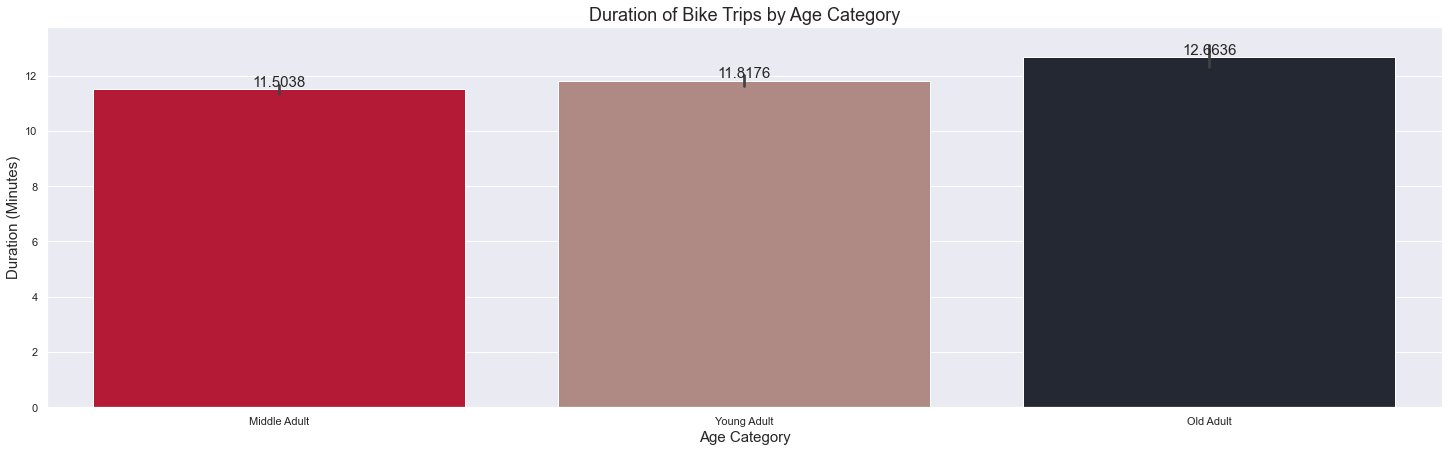

In [40]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    data=df,
    x="Age_Category", 
    y="Trip_Minutes_Duration", 
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['Age_Category'].value_counts().shape[0])
    ) 

ax.bar_label(ax.containers[0], size=15)

plt.title('Duration of Bike Trips by Age Category',size = 18) 
plt.ylabel('Duration (Minutes)', fontsize = 15) 
plt.xlabel('Age Category', fontsize = 15) 
plt.show()

**As we can see in the plot above, it seems that the duration of riding a bike varies very slightly according to the age category, as the old adults have the longest riding time by 1 minute more while young and middle adults are considered almost equal in the duration of the trip, with an average of 11.6 minutes for the trip.**

### **Q14: How does the duration of a bike ride vary with the day of the week?**

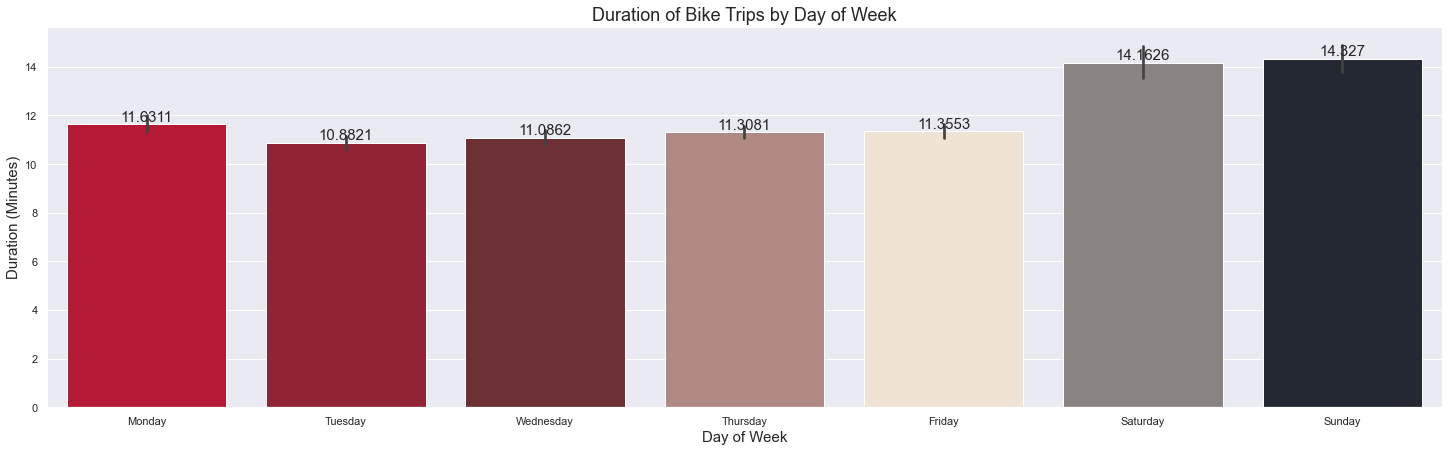

In [46]:
plt.figure(figsize = (25,7))
ax = sns.barplot(
    data=df,
    x="Day_Name", 
    y="Trip_Minutes_Duration", 
    order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] ,
    palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",df['Day_Name'].value_counts().shape[0])
    ) 

ax.bar_label(ax.containers[0], size=15)

plt.title('Duration of Bike Trips by Day of Week',size = 18) 
plt.ylabel('Duration (Minutes)', fontsize = 15) 
plt.xlabel('Day of Week', fontsize = 15) 
plt.show()

**As we can see in the plot above, it appears that bike rides tend to be longer on weekends than on weekday،this gives the impression that the weekend could be for sports trips or outings that are not usual on weekday.**

### **Q15: Is there a relationship between numerical variables?**

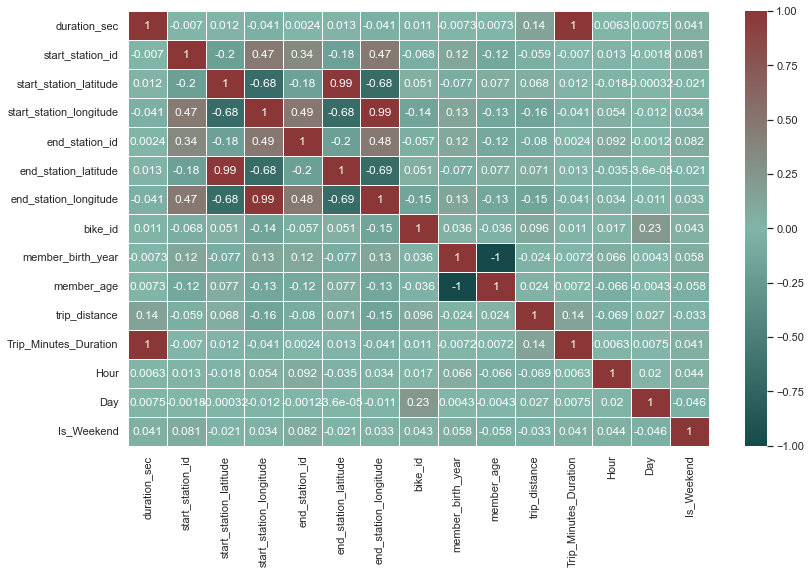

In [42]:
plt.figure(figsize=(13, 8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, cmap=sns.color_palette("blend:#164a4a,#81b5a8,#8c3737", as_cmap=True));

**As we can see in the plot above, it does not seem that there is a strong or medium correlation between the variables, most of which are less than 10 percent in both directions, except for the location variables and their numbers, and this is very natural for them to have a strong correlation because they are all complementary to each other. Even the age and year of birth, because they are derived from each other, so their correlation is considered strong**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One of the relationships observed in this investigation is that the duration of bike rides tends to be longer on weekends than on weekdays. Additionally, there is a slight difference in the duration of bike rides according to age category, with older adults having the longest riding time by 1 minute more than young and middle adults. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I observed an interesting relationship between the age category and the duration of bike rides. I also observed that weekend trips tend to be longer than weekday trips.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### **Q16: How does the duration of a trip, the distance, and the minutes spent on the trip vary?**

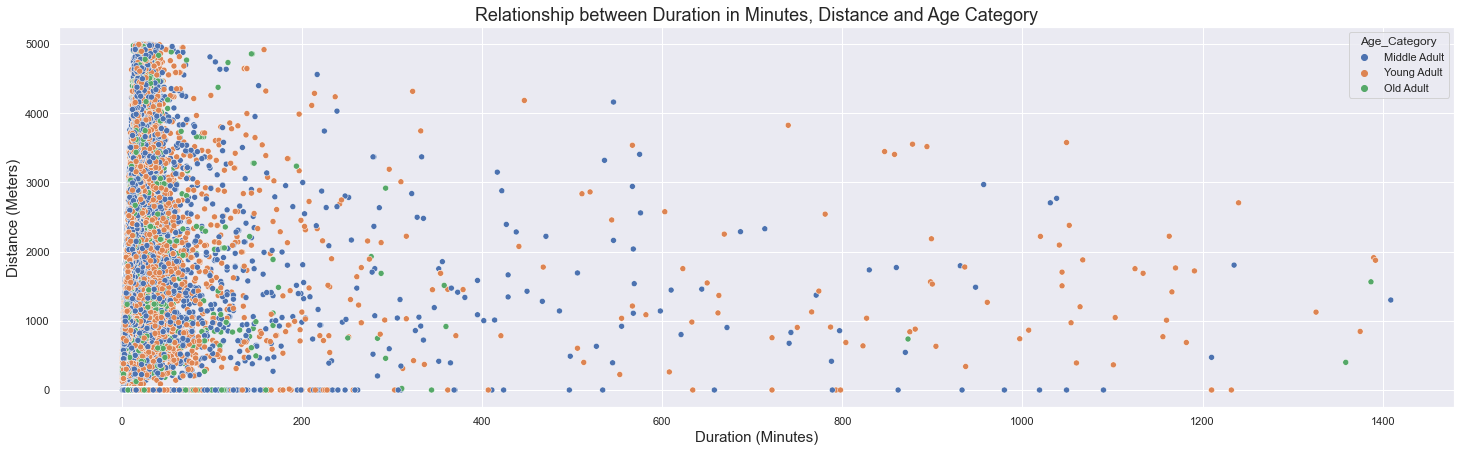

In [43]:
plt.figure(figsize = (25,7))
sns.scatterplot(
    # I Just took the most trips without the outliers
    data=df[df['trip_distance']<5000],
    x="Trip_Minutes_Duration", 
    y="trip_distance", 
    hue="Age_Category", 
    )
plt.title("Relationship between Duration in Minutes, Distance and Age Category",size = 18)
plt.ylabel('Distance (Meters)', fontsize = 15) 
plt.xlabel('Duration (Minutes)', fontsize = 15) 
plt.show()

**As we can see in the plot above, It seems that there is a positive correlation between the duration of the trip and the age category, as the longer the duration, the more often the age category consists of young adults and rarely of older adults, but no correlation was shown between the duration, distance and age group, as each increased or decreased distance does not affect the duration or age category.**

### **Q17: How does the age category vary by day of the week and trip distance and trip duration?**

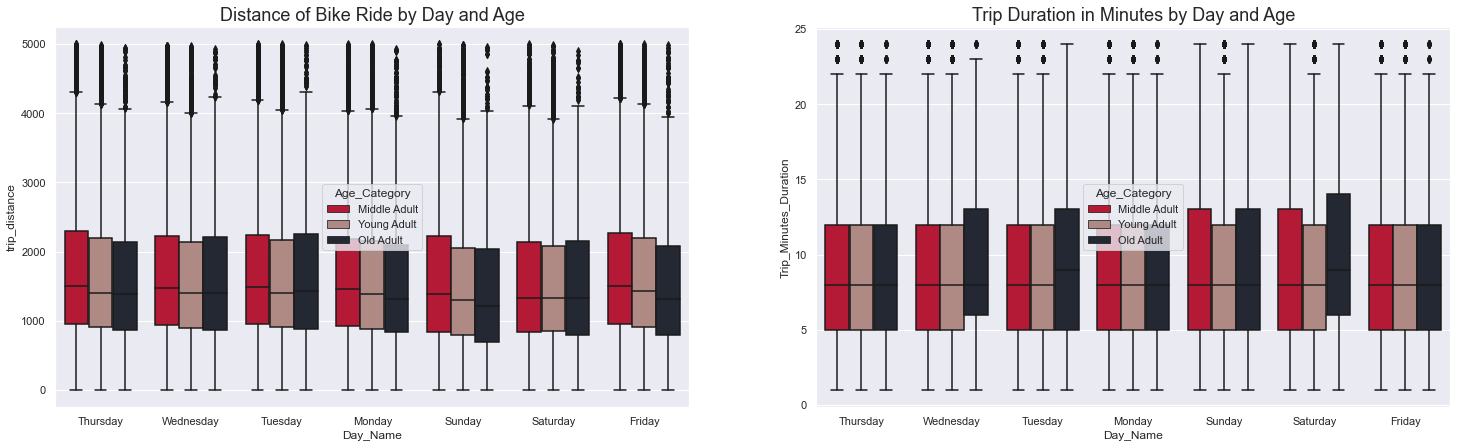

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(25,7)) 
  
# Plot the distribution of trip_distance for each Day_Name and Age_Category without outliers
sns.boxplot(
   data=df[df['trip_distance']<5000],
   x="Day_Name", 
   y="trip_distance", 
   hue="Age_Category", 
   palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",3),
   ax=ax[0]
) 
ax[0].set_title("Distance of Bike Ride by Day and Age",size = 18) 

# Plot the distribution of Trip_Minutes_Duration for each Day_Name and Age_Category without outliers
sns.boxplot(
   data=df[df['Trip_Minutes_Duration']<25],
   x="Day_Name", 
   y="Trip_Minutes_Duration", 
   hue="Age_Category", 
   palette=sns.color_palette("blend:#CE0024,#76252B,#F5E3CF,#212735",3), 
   ax=ax[1]
) 
ax[1].set_title("Trip Duration in Minutes by Day and Age",size = 18) 


plt.show()

**As we can see in the plot above, it is clear that the duration of the trip between all age categoirs and all week is equal, except on Wednesday and Saturday, we find that the older adults spend more time on the trips. On the contrary, we find the distances spent on the trip more among young adults throughout the week, except on Wednesday, Tuesday and Saturday; The number of older adults who are spending more distance has increased very slightly, and this corresponds slightly to how long they are spending more time these days.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The main relationship observed in this investigation was the positive correlation between the duration of the trip and the age category, as the longer the duration, the more often the age category consists of young adults and rarely of older adults. Additionally, there was no correlation between the duration, distance and age group. 

### Were there any interesting or surprising interactions between features?

> One interesting interaction between features was that while young adults spent more distance on trips throughout the week, except on Wednesday, Tuesday and Saturday; The number of older adults who are spending more distance has increased very slightly, and this corresponds slightly to how long they are spending more time these days. This suggests that older adults may be taking longer trips than younger adults on certain days.

## Conclusions
> In conclusion, this investigation of bike ride data from the greater San Francisco Bay area revealed some interesting insights. The distributions of the variables of interest showed that most trips occur during the working hours of 6am to 9am and 4pm to 6pm, with Thursday having the highest number of trips. The median trip duration was 9 minutes, with most trips lasting between 5 and 12 minutes, and the median trip distance was 1.4 km, with most trips ranging between 0.89 km and 2.1 km. It was observed that the duration of bike rides tends to be longer on weekends than on weekdays, and there is a slight difference in the duration of bike rides according to age category, with older adults having the longest riding time by 1 minute more than young and middle adults. Additionally, there was a positive correlation between the duration of the trip and the age category, as longer trips were more likely to be taken by young adults rather than older adults.
